In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.7.0'

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
%matplotlib inline
import numpy as np
# Use matplotlib to visualize the sample distribution
import matplotlib.pyplot as plt
import re
# Use jieba to split the word
import jieba
from gensim.models import KeyedVectors
# use genism to load pre-training word vector
import warnings
warnings.filterwarnings("ignore")
# Use bz2 to unzip the file
import bz2

In [5]:
# put the dowloaded zip file into embeddings folders
# unzip the downloaded Chinese-word-vectors file
with open("sgns.zhihu.bigram", 'wb') as new_file, open("C:/Users/12529/Desktop/Cityu/data/embeddings/sgns.zhihu.bigram.bz2", 'rb') as file:
    decompressor = bz2.BZ2Decompressor()
    for data in iter(lambda : file.read(100 * 1024), b''):
        new_file.write(decompressor.decompress(data))

In [6]:
# use genism to load pre-training word vector
cn_model = KeyedVectors.load_word2vec_format('sgns.zhihu.bigram', 
                                             binary=False)

In [7]:
embedding_dim = cn_model['香港城市大学'].shape[0]
print('词向量的长度为{}'.format(embedding_dim))
cn_model['香港城市大学']

词向量的长度为300


array([ 0.023013,  0.099276, -0.188544,  0.014892, -0.140755, -0.275439,
       -0.095019,  0.064443, -0.205539, -0.046788, -0.229846,  0.408116,
        0.173516, -0.053986,  0.278121, -0.487348,  0.006504,  0.028538,
        0.321313,  0.185489,  0.20306 ,  0.034164, -0.163552, -0.02637 ,
       -0.166576, -0.070172, -0.12176 , -0.017719,  0.218962,  0.21611 ,
       -0.127903, -0.001921, -0.290569,  0.077451,  0.026128,  0.062851,
        0.045356, -0.007478, -0.057944,  0.051172, -0.232546, -0.172068,
       -0.247718,  0.099174,  0.127989,  0.098246,  0.125703,  0.071   ,
        0.006947,  0.078257, -0.109834, -0.232685, -0.005075, -0.080271,
       -0.153889, -0.030573, -0.155043,  0.169404, -0.008193,  0.069078,
        0.070398,  0.327962, -0.087014,  0.033845,  0.185293, -0.062712,
        0.04409 ,  0.233994,  0.319075,  0.189237,  0.008978,  0.049041,
       -0.186978, -0.240406, -0.169748,  0.089397,  0.220555,  0.071285,
       -0.140622,  0.13056 ,  0.157906, -0.09437 , 

In [8]:
# Compute Similarity
cn_model.most_similar(positive=['女人','劈腿'], negative=['男人'], topn=1)

[('出轨', 0.6100173592567444)]

In [9]:
test_words = '老师 会计师 程序员 律师 医生 老人'
test_words_result = cn_model.doesnt_match(test_words.split())
print('在 '+test_words+' 中:\n不是同一类别的词为: %s' %test_words_result)

在 老师 会计师 程序员 律师 医生 老人 中:
不是同一类别的词为: 老人


In [10]:
# Samples are stored in 'pos' folder and 'neg' folder
# There are 2,000 txt files in each folder, each one contains a review
import os
pos_txts = os.listdir('chinese_sentiment-master/语料/pos')
neg_txts = os.listdir('chinese_sentiment-master/语料/neg')
print( '样本总共: '+ str(len(pos_txts) + len(neg_txts)) )

样本总共: 4000


In [11]:
# Put all the reviews in a list, each review becomes a string

train_texts_orig = []

for i in range(len(pos_txts)):
    with open('C:/Users/12529/Desktop/datala/chinese_sentiment-master/语料/pos/'+pos_txts[i], 'r', errors='ignore') as f:
        text = f.read().strip()
        train_texts_orig.append(text)
        f.close()
for i in range(len(neg_txts)):
    with open('C:/Users/12529/Desktop/datala/chinese_sentiment-master/语料/neg/'+neg_txts[i], 'r', errors='ignore') as f:
        text = f.read().strip()
        train_texts_orig.append(text)
        f.close()
        
len(train_texts_orig)

4000

In [12]:
pip install --upgrade tensorflow-gpu --user

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Use keras in tensorflow to build the model
from tensorflow.keras.models import Sequential

In [14]:
from tensorflow.keras.layers import Dense, GRU, Embedding, LSTM, Bidirectional

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
from tensorflow.keras.optimizers import RMSprop

In [18]:
from tensorflow.keras.optimizers import Adam

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [20]:
# Segmentation and tokenize
# train_tokens is a list with 4,000 strings
train_tokens = []
for text in train_texts_orig:
    # Remove the punctuation 
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",text)
    # Participle
    cut = jieba.cut(text)
    # The output is a generator
    # convert generator to list
    cut_list = [ i for i in cut ]
    for i, word in enumerate(cut_list):
        try:
            # convert word to index
            cut_list[i] = cn_model.key_to_index[word]
        except KeyError:
            cut_list[i] = 0
    train_tokens.append(cut_list)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\12529\AppData\Local\Temp\jieba.cache
Loading model cost 0.546 seconds.
Prefix dict has been built successfully.


In [21]:
num_tokens = [ len(tokens) for tokens in train_tokens ]
num_tokens = np.array(num_tokens)

In [22]:
np.mean(num_tokens)

71.42575

In [23]:
np.max(num_tokens)

1540

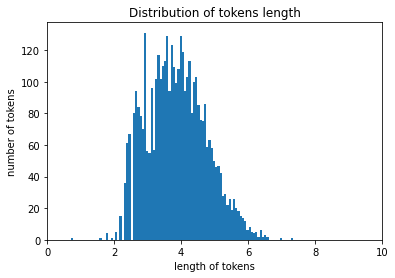

In [24]:
plt.hist(np.log(num_tokens), bins = 100)
plt.xlim((0,10))
plt.ylabel('number of tokens')
plt.xlabel('length of tokens')
plt.title('Distribution of tokens length')
plt.show()

In [25]:
# Taking the mean of the tokens and adding two standard deviations
# We assumed that the tokens lengths were normally distributed.
# the value of max_tokens could contain 95% of the tokens
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

236

In [26]:
# 95% of the tokens could be covered when the length is 236
np.sum( num_tokens < max_tokens ) / len(num_tokens)

0.9565

In [27]:
# Convert these tokens to texts for us to read
def reverse_tokens(tokens):
    text = ''
    for i in tokens:
        if i != 0:
            text = text + cn_model.index_to_key[i]
        else:
            text = text + ' '
    return text

In [28]:
reverse = reverse_tokens(train_tokens[0])

In [29]:
reverse

'早餐太差无论去多少人那边也不加食品的酒店应该重视一下这个问题了房间本身很好'

In [30]:
embedding_dim

300

In [31]:
num_words = 240000
embedding_matrixx = np.zeros((num_words, embedding_dim))
# embedding_matrix: [num_words，embedding_dim] 
# 250000 * 300
for i in range(num_words):
    embedding_matrixx[i,:] = cn_model[cn_model.index_to_key[i]]
embedding_matrixx = embedding_matrixx.astype('float32')

In [32]:
np.sum( cn_model[cn_model.index_to_key[333]] == embedding_matrixx[333] )

300

In [33]:
embedding_matrixx.shape

(240000, 300)

In [34]:
train_pad = pad_sequences(train_tokens, maxlen=max_tokens,
                            padding='pre', truncating='pre')

In [35]:
train_pad[ train_pad>=num_words ] = 0
train_pad[233]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [36]:
# Prepared the target vector. The first 2,000 samples were 1, and the last 2,000 samples were 0. 
train_target = np.concatenate( (np.ones(2000),np.zeros(2000)) )

In [37]:
# Separate the training sample from the test sample
from sklearn.model_selection import train_test_split

In [38]:
# 90% of the samples were used for training and the remaining 10% were used for testing
# The random_state was also used to scramble the order of samples
X_train, X_test, y_train, y_test = train_test_split(train_pad,
                                                    train_target,
                                                    test_size=0.1,
                                                    random_state=12)

In [39]:
# Check the samples
print(reverse_tokens(X_train[35]))
print('class: ',y_train[35])

                                                                                                                                                                                                                        房间很大还有海景阳台走出酒店就是沙滩非常不错唯一遗憾的就是不能刷银联卡不方便
class:  1.0


In [40]:
# Classifying samples using LSTM
model = Sequential()

In [41]:
# import os (Release the memory)
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [42]:
# Create the first layer, the embedding layer.
model.add(Embedding(num_words,
                    embedding_dim,
                    weights=[embedding_matrixx],
                    input_length=max_tokens,
                    trainable=False))

In [43]:
# Create the second and third layer
model.add(Bidirectional(LSTM(units=32, return_sequences=True)))
model.add(LSTM(units=16, return_sequences=False))

In [44]:
# The code of GRU
# model.add(GRU(units=32, return_sequences=True))
# model.add(GRU(units=16, return_sequences=True))
# model.add(GRU(units=4, return_sequences=False))

In [45]:
# Create the full connected layer
model.add(Dense(1, activation='sigmoid'))
# Use adam to optimize with 0.001 learning rate
optimizer = Adam(lr=1e-3)

In [46]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 236, 300)          72000000  
                                                                 
 bidirectional (Bidirectiona  (None, 236, 64)          85248     
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 72,090,449
Trainable params: 90,449
Non-trainable params: 72,000,000
_________________________________________________________________


In [48]:
# Create a checkpoint
path_checkpoint = 'sentiment_checkpoint.keras'
checkpoint = ModelCheckpoint(filepath=path_checkpoint, monitor='val_loss',
                                      verbose=1, save_weights_only=True,
                                      save_best_only=True)

In [49]:
# load the trained model
try:
    model.load_weights(path_checkpoint)
except Exception as e:
    print(e)

Unable to open file (unable to open file: name = 'sentiment_checkpoint.keras', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


In [50]:
# Define an early stoping
earlystopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [51]:
# Automatically reduce the learning rate
lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1, min_lr=1e-5, patience=0,
                                       verbose=1)

In [52]:
# define these three callback function
callbacks = [
    earlystopping, 
    checkpoint,
    lr_reduction
]

In [53]:
# Start training
model.fit(X_train, y_train,
          validation_split=0.1, 
          epochs=20,
          batch_size=128,
          callbacks=callbacks)

Epoch 1/20
26/26 [==============================] - ETA: 0s - loss: 0.6000 - accuracy: 0.6914
Epoch 00001: val_loss improved from inf to 0.49498, saving model to sentiment_checkpoint.keras
26/26 [==============================] - 15s 440ms/step - loss: 0.6000 - accuracy: 0.6914 - val_loss: 0.4950 - val_accuracy: 0.7639 - lr: 0.0010
Epoch 2/20
26/26 [==============================] - ETA: 0s - loss: 0.4158 - accuracy: 0.8201
Epoch 00002: val_loss improved from 0.49498 to 0.45642, saving model to sentiment_checkpoint.keras
26/26 [==============================] - 9s 344ms/step - loss: 0.4158 - accuracy: 0.8201 - val_loss: 0.4564 - val_accuracy: 0.8056 - lr: 0.0010
Epoch 3/20
26/26 [==============================] - ETA: 0s - loss: 0.3923 - accuracy: 0.8324
Epoch 00003: val_loss did not improve from 0.45642

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
26/26 [==============================] - 8s 324ms/step - loss: 0.3923 - accuracy: 0.8324 - val_loss: 0

In [54]:
result = model.evaluate(X_test, y_test)
print('Accuracy:{0:.2%}'.format(result[1]))

13/13 [==============================] - 1s 48ms/step - loss: 0.3602 - accuracy: 0.8675
Accuracy:86.75%


In [55]:
def predict_sentiment(text):
    print(text)
    # Remove the punctuation
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",text)
    # Participle
    cut = jieba.cut(text)
    cut_list = [ i for i in cut ]
    # Tokenize
    for i, word in enumerate(cut_list):
        try:
            cut_list[i] = cn_model.key_to_index[word]
        except KeyError:
            cut_list[i] = 0
    # Dadding
    tokens_pad = pad_sequences([cut_list], maxlen=max_tokens,
                           padding='pre', truncating='pre')
    # Prediction
    result = model.predict(x=tokens_pad)
    coef = result[0][0]
    if coef >= 0.5:
        print('是一例正面评价','output=%.2f'%coef)
    else:
        print('是一例负面评价','output=%.2f'%coef)
    return coef

In [56]:
test_list = [
    'jerry最帅了哈哈啊哈哈'
]
for text in test_list:
    predict_sentiment(text)

jerry最帅了哈哈啊哈哈
是一例正面评价 output=0.79


In [89]:
import pandas as pd
import jieba
import numpy as np

data = pd.read_csv('dogecoin4.28-5.8.csv', encoding='utf-8')
data.head()

,Unnamed: 0,username,comment,datentime
0,0,是富婆本人没错了,我刚刚已经把其他所有山寨币卖了，全冲狗狗币，over，愿意一起的就跟！注意风险控制8号之前上...,05月05日 14:49 来自 微博视频号
1,1,Tokenism通证主义,狗狗币\n1.不能做空狗狗币，不然你会倾家荡产。\n2.买一枚狗狗币，留给孩子。\n3.人...,05月05日 15:12 来自 狗狗币超话
2,2,会火大叔,很多人都问我怎么购买狗狗币，\n\n最新最详细的教程来了火火??????\n\n#狗狗币大涨...,05月05日 12:23 来自 微博视频号
3,3,Crypto熊猫,老韭菜老觉得有庄要害他，所以简单到无脑的送钱行情全踏空，亏钱行情因为复杂，一个都没落下\n\...,05月04日 20:19 来自 iPhone 12 Pro Max(海蓝色)
4,4,日安小姐,#狗狗币上涨#还有不知道怎么买的可以看下这条的评论～,05月04日 01:50


In [90]:
testcom = data['comment']
testcom2 = []
for i in testcom:
    testcom2.append(i)

In [91]:
preouts = []
for text in testcom2:
    try:
        preout = predict_sentiment(text)
        preouts.append(preout)
    except Exception:
        pass
    
print(preouts)

我刚刚已经把其他所有山寨币卖了，全冲狗狗币，over，愿意一起的就跟！注意风险控制8号之前上升空间都很大！现在市值已经排第一了，越多人买就涨得越快！！我愿意用狗子币赌一个未来～（我男朋友的山寨币也都被我卖了，给他全部安排了狗狗币）

#狗狗币# #狗狗币大涨#
L是富婆本人没错了的微博视频 收起d
是一例负面评价 output=0.13
狗狗币
1.不能做空狗狗币，不然你会倾家荡产。
2.买一枚狗狗币，留给孩子。
3.人生建议：不赌 不嫖 不吸毒 坚持定投狗狗币。
4.人生如戏，唯有爱与狗狗币不可辜负。
是一例负面评价 output=0.08
很多人都问我怎么购买狗狗币，

最新最详细的教程来了火火??????

#狗狗币大涨##怎么购买狗狗币#
#怎么买狗狗币# L会火大叔的微博视频
是一例负面评价 output=0.32
老韭菜老觉得有庄要害他，所以简单到无脑的送钱行情全踏空，亏钱行情因为复杂，一个都没落下

狗狗币#狗狗币大涨##狗狗币#
是一例负面评价 output=0.13
#狗狗币上涨#还有不知道怎么买的可以看下这条的评论～
是一例正面评价 output=0.54
#狗狗币# 再次领涨？到底怎么了，是这个世界太疯狂还是我们太无知？今年为止已经涨了140倍，根据欧易OKEx显示，今日最高价格已经接近0.7美金了，24小时成交额都超过了以太坊，很多人都在猜测狗狗币会不会突破1美金，那这么火热的狗狗币，到底是什么？还能下手吗？现在买还来的及吗？做决定之前，不如先点击下方视频，一分钟了解神奇的狗狗币 #狗狗币大涨# #狗狗币上涨# O网页链接 收起d
是一例负面评价 output=0.22
【#狗狗币#飙升50% 市场狂欢一度令Robinhood系统瘫痪】在加密货币世界中，动物精神非常活跃且狂热，狗狗币直线飙升50%，Robinhood的交易App一度因此瘫痪。Miller Tabak +Co．的首席市场策略师Matt Maley表示，“从当初一个笑话到现在变得如此流行，真是太令人吃惊了。”O狗狗币飙升50% 市场狂欢一度令Robinhood系统瘫痪
是一例负面评价 output=0.13
#比特币大佬看衰狗狗币#：建议不要购买狗狗币，无知的投资者赶紧卖了吧。
是一例负面评价 output=0.16
#狗狗币# 的创始人有两位，一位是它的开发者比利·马库斯，

是一例负面评价 output=0.11
财经狗狗币24小时涨幅超过40%！在我看来，未来富豪资产配置一定会有加密货币。你们准备好了吗？#狗狗币大涨#
是一例负面评价 output=0.11
【#狗狗币市值超SpaceX# ，马斯克：谨慎投资】5月7日，特斯拉CEO埃隆·马斯克转发一段标题为“马斯克称狗狗币可能成为加密货币的未来”的视频，并配文称，加密货币很有前景，但请谨慎投资！近来狗狗币涨势迅猛，根据美国证券交易委员会文件，周四狗狗币市值已超780亿美元，比马斯克私人控股火箭公司SpaceX的估值高出40亿美元。L界面Vnews的微博视频 收起d
是一例负面评价 output=0.13
#狗狗币#【还把它当玩笑？#狗狗币市值直逼900亿美元#】加密货币市场曾被鲁比尼描述为“所有泡沫之母”。也许以往各国政府和中央银行数万亿美元的刺激计划可能触发过黄金和高风险股大涨，但这次海量资金奔向的是新生的加密货币市场。O还把它当玩笑？狗狗币市值直逼900亿美元
是一例负面评价 output=0.13
【比比特币还疯狂！#狗狗币半年暴涨260倍# 一个玩笑竟“完爆”所有资产类别】在近期的这股加密货币热潮下，谁也没想到最大的赢家竟不是比特币，而是起源于一个玩笑的狗狗币（Dogecoin）。今年以来，狗狗币屡创新高，6个月涨幅超过260倍，市值也一度到达约920亿美元。相比之下，标准普尔500指数在这6个月内仅上涨了19%，而同为加密货币的比特币和以太币仅分别上涨了286%和698%。就连股市宠儿特斯拉自去年11月以来也只上涨了56%。而最荒谬之处在于，这一受到热捧、一路暴涨的币种最初竟是诞生于一个玩笑，创始人为了讽刺比特币圈的投机氛围，以夸张戏谑的Doge狗头表情包作为标志，但后来这个玩笑越开越大，引来马斯克为其站台，将狗狗币的热炒情绪不断带向新高度。O比比特币还疯狂！狗狗币半年暴涨260倍 一个玩笑竟“完爆”所有资产类别 收起d
是一例负面评价 output=0.10
【贝拉：聊聊比特币、以太坊、狗狗币等】（via YT：贝拉聊财金）观点供参考。#比特币##狗狗币# L全球视频精选Premium的微博视频
是一例正面评价 output=0.58
【#狗狗币市值超SpaceX# ，马斯克：谨慎投资】5月7日，特斯拉CEO埃隆·马斯克转发一段标题为“马斯克称狗狗币可能成为加密货币的未

In [92]:
preouts

[0.13495362,
 0.07898942,
 0.3161262,
 0.13179445,
 0.53856283,
 0.22287047,
 0.13298634,
 0.15512624,
 0.08768916,
 0.52564365,
 0.15230048,
 0.17231119,
 0.07381925,
 0.41931713,
 0.84159756,
 0.3213745,
 0.14288524,
 0.16823635,
 0.09958127,
 0.57253176,
 0.86895716,
 0.5077516,
 0.32118732,
 0.6205867,
 0.12437862,
 0.090504885,
 0.52003145,
 0.16486257,
 0.09033659,
 0.18162185,
 0.08316046,
 0.14246467,
 0.117584646,
 0.14784575,
 0.08769491,
 0.065601975,
 0.15794656,
 0.13650483,
 0.10052967,
 0.1333021,
 0.15167186,
 0.08664641,
 0.0868288,
 0.88828164,
 0.33396268,
 0.19790831,
 0.13788494,
 0.057372153,
 0.553874,
 0.11190143,
 0.10535985,
 0.12200311,
 0.2264697,
 0.842831,
 0.11398214,
 0.111783236,
 0.12544847,
 0.1333021,
 0.10086337,
 0.5840524,
 0.12544847,
 0.47714356,
 0.838765,
 0.07793322,
 0.26047847,
 0.12544847,
 0.09577346,
 0.060801297,
 0.24819893,
 0.3552006,
 0.4095329,
 0.10157597,
 0.25688526,
 0.07405931,
 0.2041406,
 0.08275905,
 0.21267486,
 0.11264577

In [93]:
from numpy import *

In [95]:
surge2 = mean(preouts)
print(surge2)

0.24133001


In [96]:
# Check the misclassified texts
y_pred = model.predict(X_test)
y_pred = y_pred.T[0]
y_pred = [1 if p>= 0.5 else 0 for p in y_pred]
y_pred = np.array(y_pred)

In [97]:
y_actual = np.array(y_test)

In [98]:
# Find the misclassified index
misclassified = np.where( y_pred != y_actual )[0]

In [99]:
misclassified

array([  5,  14,  15,  21,  23,  24,  30,  38,  42,  59,  73,  87,  89,
        93, 101, 123, 125, 127, 128, 130, 135, 138, 160, 177, 182, 189,
       202, 211, 214, 218, 223, 228, 238, 244, 246, 253, 258, 267, 277,
       285, 286, 292, 302, 305, 311, 347, 349, 352, 357, 360, 365, 373,
       394], dtype=int64)

In [100]:
# Output the misclassified indexs
len(misclassified)
print(len(misclassified))

53


In [101]:
# Find a sample of misclassified errors.
idx=101
print(reverse_tokens(X_test[idx]))
print('预测的分类', y_pred[idx])
print('实际的分类', y_actual[idx])

                                                                                                                                                        由于2007年新装修有一些新问题可能还没来得及解决我因为工作需要经常要住那里所以慎重的提出以下意见建议：1新装修后 的淋浴间淋浴喷头的位置都太高我换了房间还是一样很不好用2新开业后的一些管理和服务还很不到位尤其是前台入住和结帐时代效率太低每次结帐都超过10分钟好像不符合 宾馆的要求
预测的分类 0
实际的分类 1.0


In [102]:
idx=1
print(reverse_tokens(X_test[idx]))
print('预测的分类', y_pred[idx])
print('实际的分类', y_actual[idx])

                                                                                                                                                                                                                 还是很幽静设施也不错但是服务水平和以前 比急剧下滑了接线员和客房服务中心的服务极差幸好我不是很在乎
预测的分类 1
实际的分类 1.0
